In [73]:
from keras.datasets import mnist
(train_X, train_y), (test_X, test_y) = mnist.load_data()

In [74]:
print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


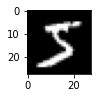

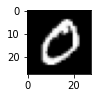

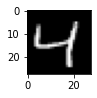

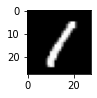

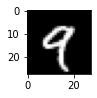

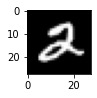

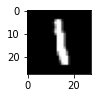

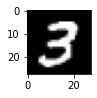

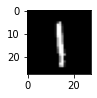

In [75]:
from matplotlib import pyplot
for i in range(9):  
  pyplot.subplot(330 + 1 + i)
  pyplot.imshow(train_X[i], cmap=pyplot.get_cmap('gray'))
  pyplot.show()

In [114]:
import numpy as np

#clusters = k
clusters = 10
d = 784
size = 1000

mu = np.random.rand(d,clusters)
pi = np.random.rand(clusters)

train_X = train_X.reshape(60000, d)

def k_u(x):
  results = np.array([])
  for k in range(clusters):
    sum = 0
    for j in range(d):
      sum += np.log(mu[j][k])*x[j] + np.log((1-mu[j][k]))*(1-x[j])
      # print(sum)
    results = np.append(results, sum)
  return results

def alg(iterations):
  for _ in range(iterations):
    final = np.array([])
    for i in range(size):
      x = k_u(np.asarray(train_X[i]))
      final = np.append(final, np.argmax(x))

    # print(final)
    N_k = np.array([])

    for i in range(10):
      N_k = np.append(N_k, np.count_nonzero(final == i))

    for i in range(10):
      print('Amount of ' + str(i) + " in N_k: " + str(N_k[i]))

    pi_k = N_k * (1/size)

    # print(pi_k)

    # Sanity check
    # print(np.sum(pi_k))

    M = np.zeros((d, clusters))

    for k in range(clusters):
      for j in range(d):
        sum = 0
        for u in range(size):
          if final[u] == k:
            sum += train_X[u][j]
        if not N_k[k] == 0:
          sum *= (1/N_k[k])
        M[j][k] = sum

    mu = M
    # print(alg_mu)
  return mu

In [115]:
Fin_result = alg(20)

Amount of 0 in N_k: 338.0
Amount of 1 in N_k: 24.0
Amount of 2 in N_k: 0.0
Amount of 3 in N_k: 43.0
Amount of 4 in N_k: 4.0
Amount of 5 in N_k: 296.0
Amount of 6 in N_k: 54.0
Amount of 7 in N_k: 82.0
Amount of 8 in N_k: 75.0
Amount of 9 in N_k: 84.0
Amount of 0 in N_k: 338.0
Amount of 1 in N_k: 24.0
Amount of 2 in N_k: 0.0
Amount of 3 in N_k: 43.0
Amount of 4 in N_k: 4.0
Amount of 5 in N_k: 296.0
Amount of 6 in N_k: 54.0
Amount of 7 in N_k: 82.0
Amount of 8 in N_k: 75.0
Amount of 9 in N_k: 84.0
Amount of 0 in N_k: 338.0
Amount of 1 in N_k: 24.0
Amount of 2 in N_k: 0.0
Amount of 3 in N_k: 43.0
Amount of 4 in N_k: 4.0
Amount of 5 in N_k: 296.0
Amount of 6 in N_k: 54.0
Amount of 7 in N_k: 82.0
Amount of 8 in N_k: 75.0
Amount of 9 in N_k: 84.0
Amount of 0 in N_k: 338.0
Amount of 1 in N_k: 24.0
Amount of 2 in N_k: 0.0
Amount of 3 in N_k: 43.0
Amount of 4 in N_k: 4.0
Amount of 5 in N_k: 296.0
Amount of 6 in N_k: 54.0
Amount of 7 in N_k: 82.0
Amount of 8 in N_k: 75.0
Amount of 9 in N_k: 84.0


0


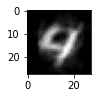

1


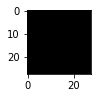

2


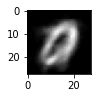

3


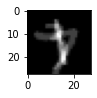

4


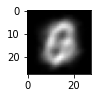

5


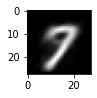

6


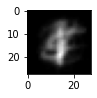

7


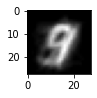

8


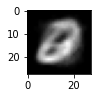

In [116]:
Fin_result = np.swapaxes(Fin_result,0,1)
Fin_result = Fin_result.reshape(10,28,28)

for i in range(9):  
  print(i)
  pyplot.subplot(330 + 1 + i)
  pyplot.imshow(Fin_result[i+1], cmap=pyplot.get_cmap('gray'))
  pyplot.show()

k[u]= pick k , so that $\Pi_j^d u_{jk}^{x_j^u}(1-u_{jk})^{1-x_j^u}$ is maximal

j $\in$ 1 ... d : size of vectors x \\
$k\in$ K : clusters

$N_k =$ amount of $k_u=k$ \\
$\pi_k=N_k/N$ \\
$m_{jk}=1/N_k \sum_{u\in k} x_j^u$ \\
set $u_{jk}=m_{jk}$